In [299]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold

In [300]:
# generate random data for dogs and cats
np.random.seed(42)

In [301]:
# dogs have higher ear flappiness index
dog_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dog_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [302]:
# cats have lower ear flappiness index
cat_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cat_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)

In [303]:
# combine the data
dogs_data = np.vstack((dog_whisker_length, dog_ear_flappiness_index)).T
cats_data = np.vstack((cat_whisker_length, cat_ear_flappiness_index)).T
data = np.vstack((dogs_data, cats_data))
labels = np.hstack((np.zeros(len(dogs_data)), np.ones(len(cats_data))))

In [304]:
# split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

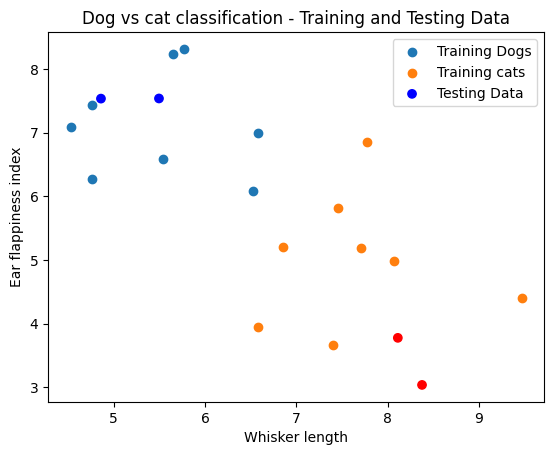

In [305]:
# plot the data
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Training Dogs')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Training cats')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='bwr', label='Testing Data')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappiness index')
plt.title('Dog vs cat classification - Training and Testing Data')
plt.legend()
plt.show()

In [306]:
# implementing the random linear classifier
def random_linear_classifier(data_dogs, data_cats, k, d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None

    for _ in range(k):
     theta = np.random.normal(size=d)
     theta0 = np.random.normal()

    error = compute_error(data_dogs, data_cats, theta, theta0)

    if error < best_error:
       best_error = error
       best_theta = theta
       best_theta0 = theta0
    
    return best_theta, best_theta0, best_error


def compute_error(data_dogs, data_cats, theta, theta0):
   error = 0
   for x_dog in data_dogs:
      if np.dot(theta, x_dog) + theta0 <= 0:
         error += 1
   for x_cat in data_cats:
      if np.dot(theta, x_cat) + theta0 > 0:
         error += 1
    
   return error

In [307]:
# define function for kfold cross validation
def cross_validate(data_dogs, data_cats, k_values, d, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    avg_errors = []

    for k in k_values:
        errors = []

        for train_index, val_index in kf.split(data_dogs):
            x_train_fold = np.vstack((data_dogs[train_index], data_cats[train_index]))
            y_train_fold = np.hstack((np.zeros(len(train_index)), np.ones(len(train_index))))
            x_val_fold = np.vstack((data_dogs[val_index], data_cats[val_index]))
            y_val_fold = np.hstack((np.zeros(len(val_index)), np.ones(len(val_index))))

            best_theta_fold, best_theta0_fold, error = random_linear_classifier(x_train_fold[y_train_fold == 0], x_train_fold[y_train_fold == 1], k, d)

            errors.append(compute_error(x_val_fold[y_val_fold == 0], x_val_fold[y_val_fold == 1], best_theta_fold, best_theta0_fold))

        avg_errors.append(np.mean(errors))

    best_k = k_values[np.argmin(avg_errors)]
    return best_k

# define k values to try
k_values = [100, 200, 300, 400, 500]

best_k = cross_validate(dogs_data, cats_data, k_values, d=2)

print(f"Best value of k:  {best_k}")


Best value of k:  100


In [308]:
# running the linear algorithm
k = best_k
d = 2
best_theta_train, best_theta0_train, train_error = random_linear_classifier(x_train[y_train == 0], x_train[y_train == 1], k, d)


In [309]:
# plot the decision boundary on training data
x_vals_train = np.linspace(2, 10, 100)
y_vals_train = (-best_theta_train[0] / best_theta_train[1]) + x_vals_train - (best_theta0_train / best_theta_train[1])


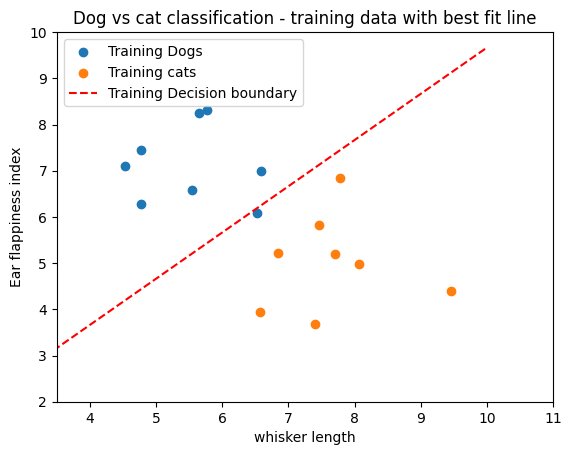

In [310]:
#plotting the data
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1], label='Training Dogs')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1], label='Training cats')
plt.plot(x_vals_train, y_vals_train, color='red', linestyle='--', label='Training Decision boundary' )
plt.xlim([3.5, 11])
plt.ylim([2, 10])
plt.xlabel('whisker length')
plt.ylabel('Ear flappiness index')
plt.title('Dog vs cat classification - training data with best fit line')
plt.legend()
plt.show()

In [311]:

print(f"Training error: {train_error}")

Training error: 8


In [312]:
# compute testing error
test_error = compute_error(x_test[y_test == 0], x_test[y_test == 1], best_theta_train, best_theta0_train)
print(f"Testing Error: {test_error}")

Testing Error: 2


In [313]:
''' #plot the actual test data and predicted test data
plt.scatter(x_test[y_test == 0][:, 0], x_test[y_test == 0][:, 1], label='Actual dogs')
plt.scatter(x_test[y_test == 1][:, 0], x_test[y_test == 1][:, 1], label='Actual cats')

# predict test data points using the decision boundary
predicted_labels = np.zeros_like(y_test)
for i, X_test in enumerate(x_test):
    if np.dot(best_theta_train, X_test) + best_theta0_train > 0:
        predicted_labels[i] = 1

# plot predicted test data points
plt.scatter(x_test[predicted_labels == 0][:, 0], x_test[predicted_labels == 0][:, 1], marker='x', label='predicted dogs')
plt.scatter(x_test[predicted_labels == 1][:, 0], x_test[predicted_labels == 1][:, 1], marker='x', label='predicted cats')

# plot decision boundary
plt.plot(x_vals_test, y_vals_test, colour='red', linestyle='--', label='Decision boundary')

plt.xlabel('whisker length')
plt.ylabel('Ear flappiness index')
plt.title('Dogs vs cats classification - Actual vs predicted test data')
plt.legend()
plt.show()

_IncompleteInputError: incomplete input (2402986270.py, line 1)